# **Proyecto 2 y 3**
El propósito de este proyecto es que los estudiantes apliquen los conocimientos adquiridos en análisis exploratorio de datos, normalización y limpieza de datos y modelos de aprendizaje automático.

## Importacion de librerias

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


En este proyecto se utilizaran 3 criptomonedas, se unifican en un solo dataframe para mejor manejo.

In [142]:
df1 = pd.read_csv('./crypto_currencies/coin_Bitcoin.csv')
df2 = pd.read_csv('./crypto_currencies/coin_Litecoin.csv')
df3 = pd.read_csv('./crypto_currencies/coin_Monero.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


In [143]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,8584.000000,8584.000000,8584.000000,8584.000000,8584.000000,8.584000e+03,8.584000e+03
mean,1437.042754,2443.242526,2297.695559,2374.203672,2378.117650,4.297519e+09,4.351512e+10
std,835.835690,7603.848963,7109.136298,7375.720130,7383.372253,1.224228e+10,1.367798e+11
min,1.000000,0.251757,0.212967,0.220121,0.223522,0.000000e+00,1.279606e+06
25%,716.000000,9.812452,8.873865,9.349090,9.392102,3.418658e+06,2.134455e+08
50%,1431.000000,91.571416,85.498041,88.624752,88.675180,7.130490e+07,2.851460e+09
75%,2146.250000,469.253494,448.991257,458.386986,458.922989,2.058342e+09,9.183906e+09
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


Eliminacion de la hora en la variable date

In [144]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8584 entries, 0 to 8583
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        8584 non-null   int64  
 1   Name       8584 non-null   object 
 2   Symbol     8584 non-null   object 
 3   Date       8584 non-null   object 
 4   High       8584 non-null   float64
 5   Low        8584 non-null   float64
 6   Open       8584 non-null   float64
 7   Close      8584 non-null   float64
 8   Volume     8584 non-null   float64
 9   Marketcap  8584 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 670.8+ KB


### Visualizacion de datos nulos

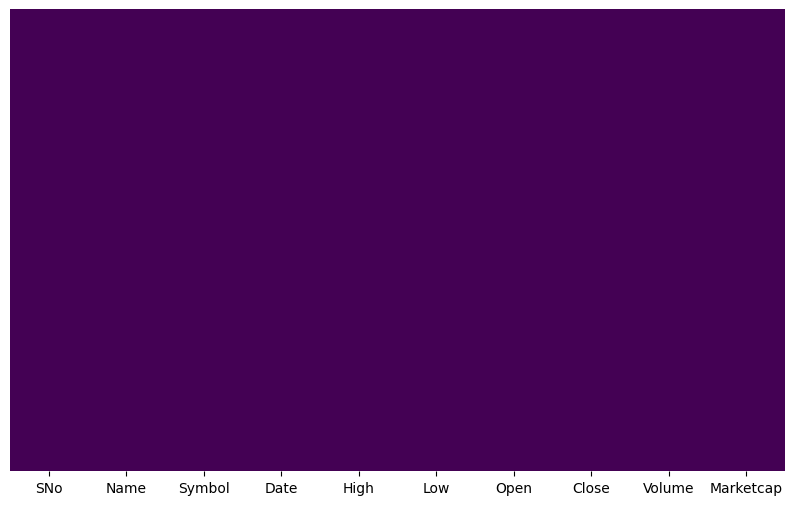

In [145]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.show()

## Deteccion y eliminacion de valores atipicos
Histograma de precio criptomonedas

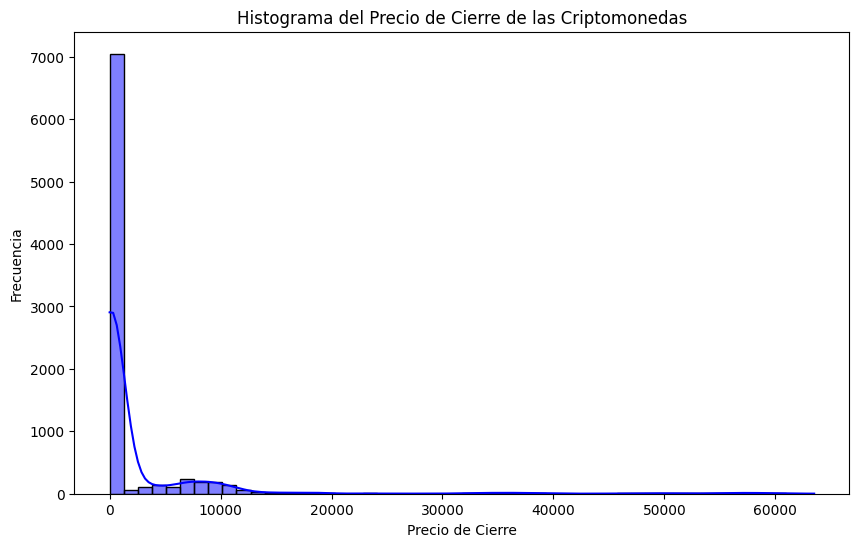

In [146]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

Calculamos el rango intercuartil para filtrar los valores extremos

In [147]:
Q1, Q3 = df['Close'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lim_inferior, lim_superior = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
print(f"Limite Inferior: {lim_inferior}, Limite Superior: {lim_superior}")

Limite Inferior: -664.9042277336121, Limite Superior: 1133.2193188667297


In [148]:
df[(df['Close'] < lim_inferior) | (df['Close'] > lim_superior)]

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
219,220,Bitcoin,BTC,2013-12-04,1156.119995,1070.160034,1077.579956,1151.170044,0.000000e+00,1.390343e+10
1346,1347,Bitcoin,BTC,2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1.857187e+10
1396,1397,Bitcoin,BTC,2017-02-23,1176.619995,1116.959961,1117.270020,1166.719971,1.894540e+08,1.887744e+10
1397,1398,Bitcoin,BTC,2017-02-24,1200.390015,1131.959961,1172.709961,1173.680054,3.307590e+08,1.899242e+10
1398,1399,Bitcoin,BTC,2017-02-25,1174.849976,1124.589966,1170.410034,1143.839966,1.399610e+08,1.851191e+10
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


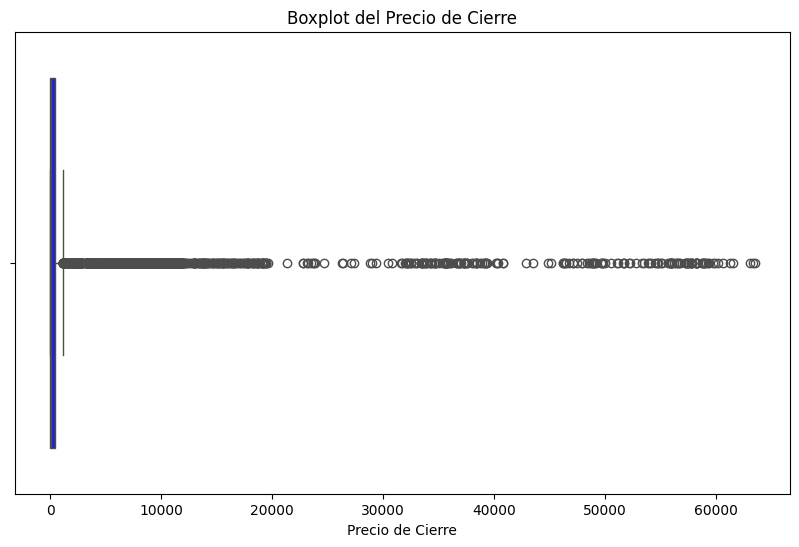

In [149]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Close'], color='blue')
plt.title('Boxplot del Precio de Cierre')
plt.xlabel('Precio de Cierre')
plt.show()

In [150]:
df = df[(df['Close'] >= lim_inferior) & (df['Close'] <= lim_superior)]

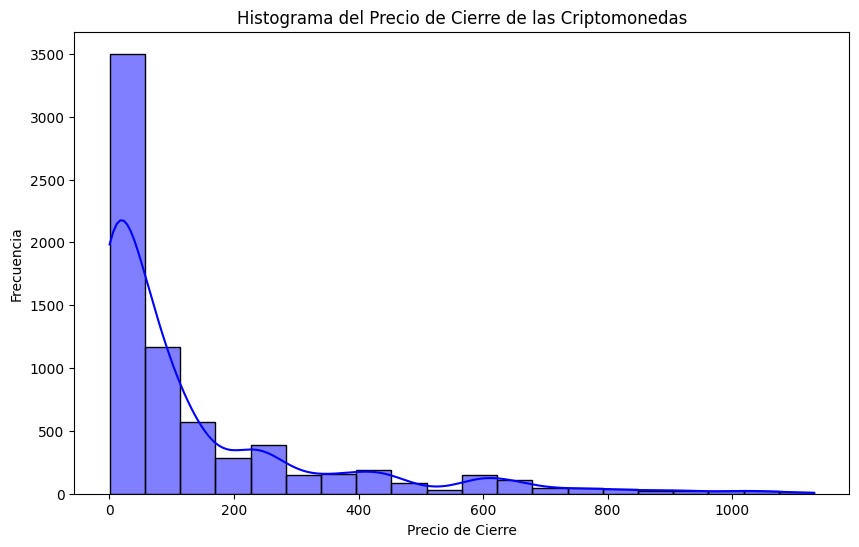

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

### Conversion a formato `Date`
Esto se hace con el proposito de realiza run analisis temporal mas adelante.

In [152]:
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtypes)

datetime64[ns]


### Codificacion de variables categoricas
Usaremos One-Hot Encoding para convertir el nombre de las criptomonedas en variables binarias

In [153]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_crypto_name = encoder.fit_transform(df[['Name']])
name_columns = encoder.get_feature_names_out(['Name'])
encoded_df = pd.DataFrame(encoded_crypto_name, columns=name_columns)

df = df.reset_index(drop=True).join(encoded_df)
df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,Monero,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,Monero,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,Monero,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,Monero,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


In [154]:
df = df.drop(columns=['Name'])
df.reset_index(drop=True, inplace=True)
df

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Name_Bitcoin,Name_Litecoin,Name_Monero
0,1,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,1.0,0.0,0.0
1,2,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,1.0,0.0,0.0
2,3,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,1.0,0.0,0.0
3,4,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,1.0,0.0,0.0
4,5,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7001,2598,XMR,2021-07-02,211.666077,199.608531,206.252403,211.345143,1.519434e+08,3.792466e+09,0.0,0.0,1.0
7002,2599,XMR,2021-07-03,216.327967,207.042192,211.458163,214.752778,1.364141e+08,3.853768e+09,0.0,0.0,1.0
7003,2600,XMR,2021-07-04,224.909012,213.023069,214.839958,219.841418,1.697858e+08,3.945232e+09,0.0,0.0,1.0
7004,2601,XMR,2021-07-05,220.354191,206.502607,219.961957,214.464993,1.709852e+08,3.848898e+09,0.0,0.0,1.0


### Normalizacion de datos
Se normalizaran los datos con Z-Score, este tipo de normalizacion es mejor para manejar outliers y para el modelo de regresion lineal.
Antes de la normalizacion, veremos como esta distribuido el `Marketcap` a traves de un histograma.

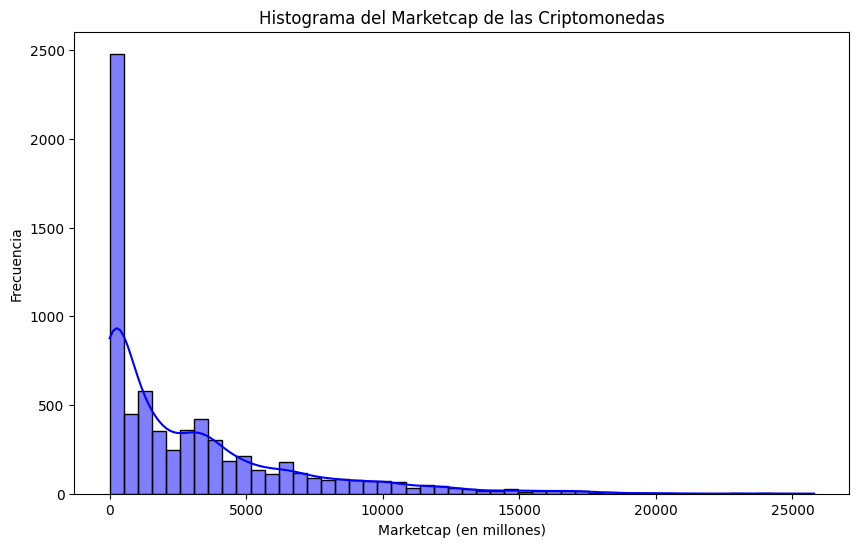

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap (en millones)')
plt.ylabel('Frecuencia')
plt.show()

In [156]:
#Normalizacion de datos
df.loc[:, 'Close'] = StandardScaler().fit_transform(df[['Close']])
df.loc[:, 'Marketcap'] = StandardScaler().fit_transform(df[['Marketcap']])

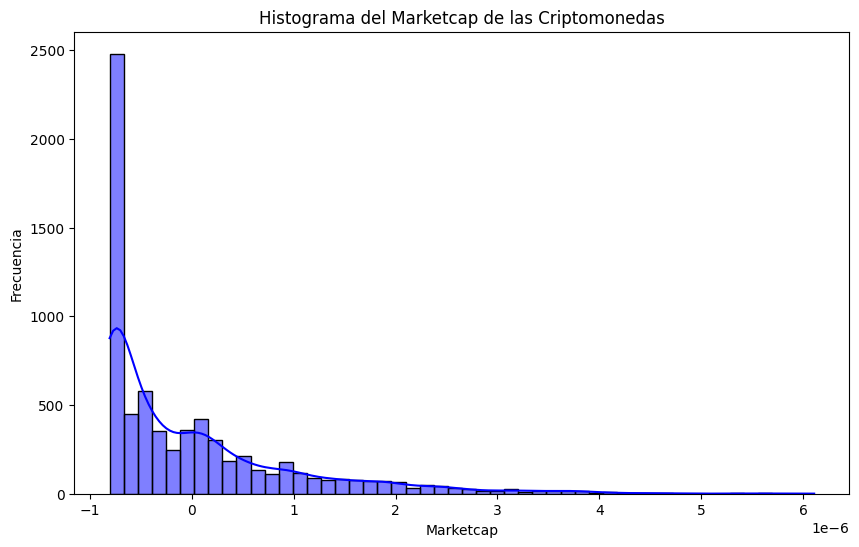

In [157]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Marketcap'] / 1e6, bins=50, kde=True, color='blue')  # Escala en millones
plt.title('Histograma del Marketcap de las Criptomonedas')
plt.xlabel('Marketcap')
plt.ylabel('Frecuencia')
plt.show()

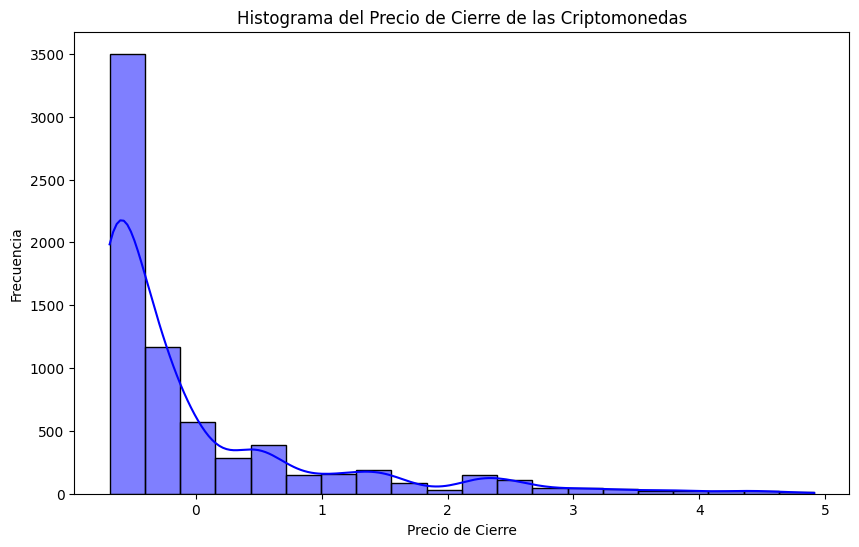

In [158]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True, color='blue')
plt.title('Histograma del Precio de Cierre de las Criptomonedas')
plt.xlabel('Precio de Cierre')
plt.ylabel('Frecuencia')
plt.show()

## Implementacion Regresion Lineal
La variable dependiente(Y) es `Close` y variable independiente(X) `Marketcap`.

Procesando regresión lineal para: Name_Bitcoin


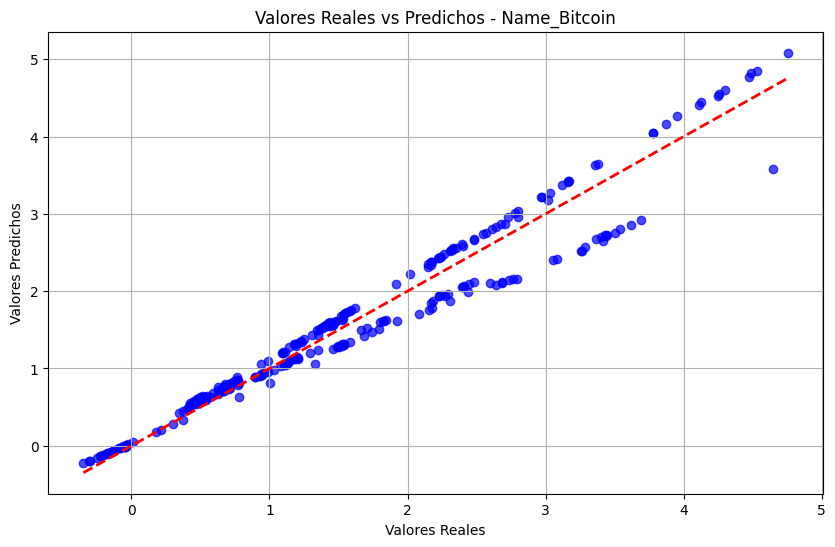

Resultados para Name_Bitcoin:
  Coeficientes: [1.16078044]
  Intercepto: 0.46829362997644686
  Error Cuadrático Medio: 0.06832179161459317
  R²: 0.9492893762760795
--------------------------------------------------
Procesando regresión lineal para: Name_Litecoin


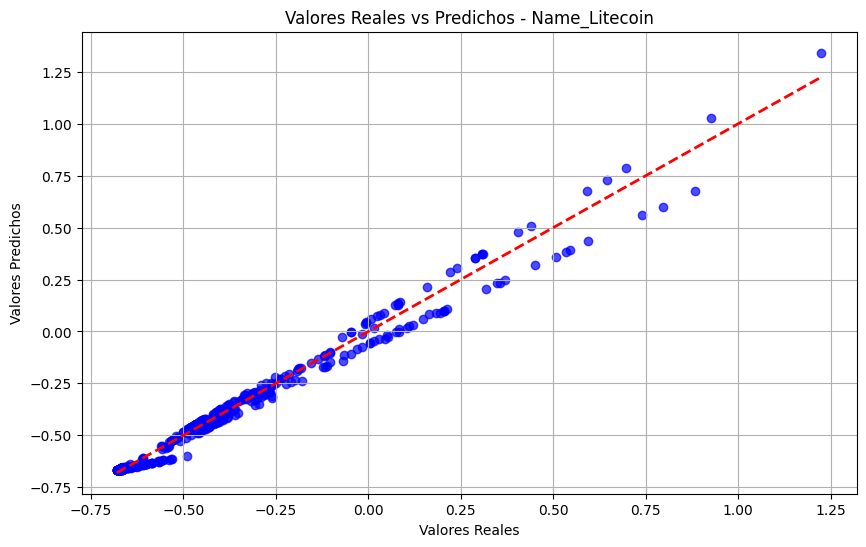

Resultados para Name_Litecoin:
  Coeficientes: [0.29158785]
  Intercepto: -0.43813790136922065
  Error Cuadrático Medio: 0.0013060507238393162
  R²: 0.985570438321987
--------------------------------------------------
Procesando regresión lineal para: Name_Monero


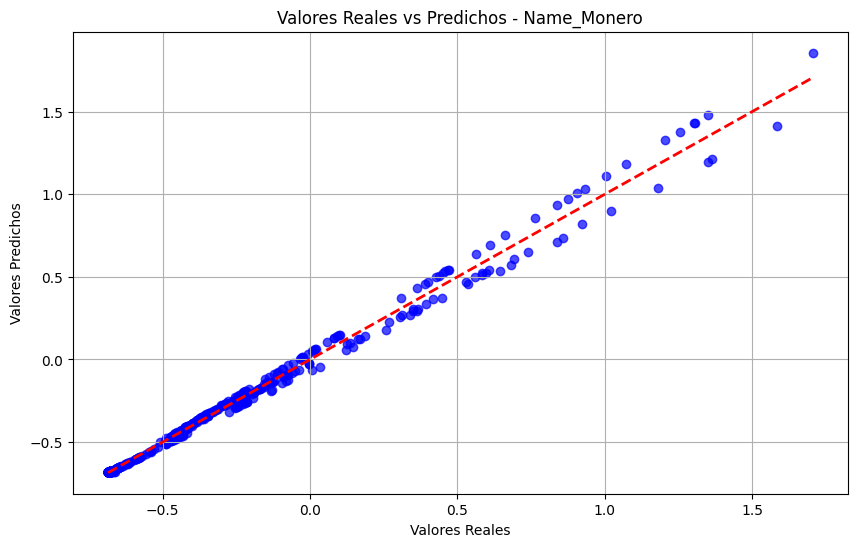

Resultados para Name_Monero:
  Coeficientes: [1.09482313]
  Intercepto: 0.19830094566157708
  Error Cuadrático Medio: 0.0012685178627300363
  R²: 0.9935234879971546
--------------------------------------------------


In [159]:
# ...existing code...

# Identificar las columnas dummies de las criptomonedas
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados
results = {}

for crypto_col in crypto_columns:
    print(f"Procesando regresión lineal para: {crypto_col}")
    
    # Filtrar datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1]
    
    # Variables independientes y dependientes
    X = crypto_df[['Marketcap']]
    y = crypto_df['Close']
    
    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Gráfico de valores reales vs predichos
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Valores Reales vs Predichos - {crypto_col}")
    plt.xlabel("Valores Reales")
    plt.ylabel("Valores Predichos")
    plt.grid()
    plt.show()

    # Evaluar el modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar resultados
    results[crypto_col] = {
        'Coeficientes': model.coef_,
        'Intercepto': model.intercept_,
        'MSE': mse,
        'R2': r2
    }
    
    print(f"Resultados para {crypto_col}:")
    print(f"  Coeficientes: {model.coef_}")
    print(f"  Intercepto: {model.intercept_}")
    print(f"  Error Cuadrático Medio: {mse}")
    print(f"  R²: {r2}")
    print("-" * 50)

## Implementacion LSTM (Long Short-Term Memory)


Procesando predicciones para: Name_Bitcoin
Epoch 1/20


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.1947 - val_loss: 0.1773
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0338 - val_loss: 0.0523
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0231 - val_loss: 0.0426
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0176 - val_loss: 0.0514
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0194 - val_loss: 0.0673
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0233 - val_loss: 0.0357
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0173 - val_loss: 0.1001
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0169 - val_loss: 0.0404
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0204 - val_loss: 0.0413
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0148 - val_loss: 0.0481
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0157 - val_loss: 0.0602
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0154 - val_l

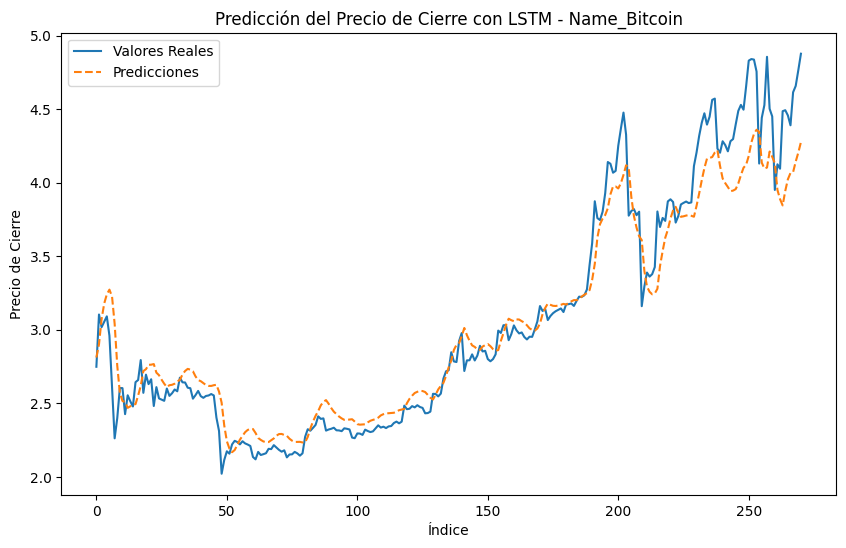

Procesando predicciones para: Name_Litecoin
Epoch 1/20


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1615 - val_loss: 0.1028
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0281 - val_loss: 0.0580
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0157 - val_loss: 0.0477
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0124 - val_loss: 0.0365
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0132 - val_loss: 0.0326
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0105 - val_loss: 0.0370
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0156 - val_loss: 0.0351
Epoch 8/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0107 - val_loss: 0.0331
Epoch 9/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0114 - val_loss: 0.0522
Epoch 10/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0101 - val_loss: 0.0370
Epoch 11/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0076 - val_loss: 0.0308
Epoch 12/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0104 - val_l

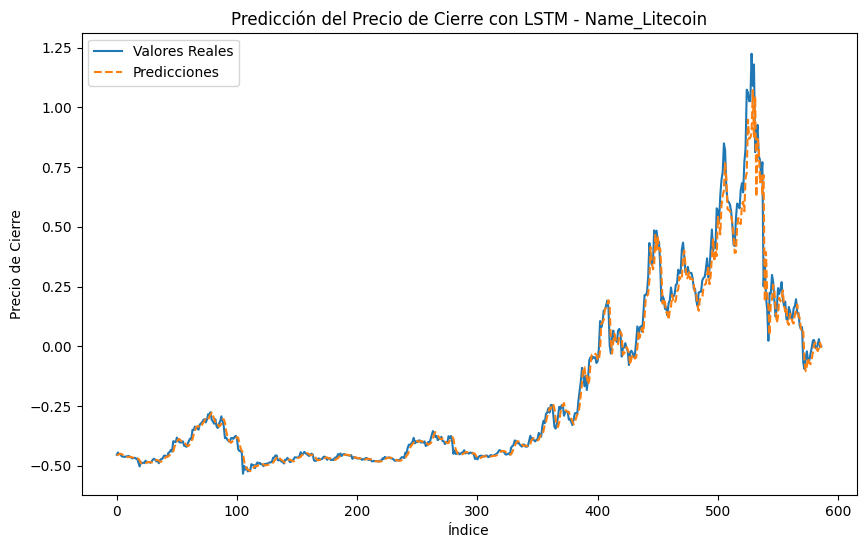

Procesando predicciones para: Name_Monero
Epoch 1/20


v:\Ciencia de Datos\Crypto-price-prediction\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.4104 - val_loss: 0.0766
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0231 - val_loss: 0.0545
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0217 - val_loss: 0.0633
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0150 - val_loss: 0.0426
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0155 - val_loss: 0.0456
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0200 - val_loss: 0.0416
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0129 - val_loss: 0.0366
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0189 - val_loss: 0.0311
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0175 - val_loss: 0.0338
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0166 - val_loss: 0.0268
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0122 - val_loss: 0.0283
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0116 - val_l

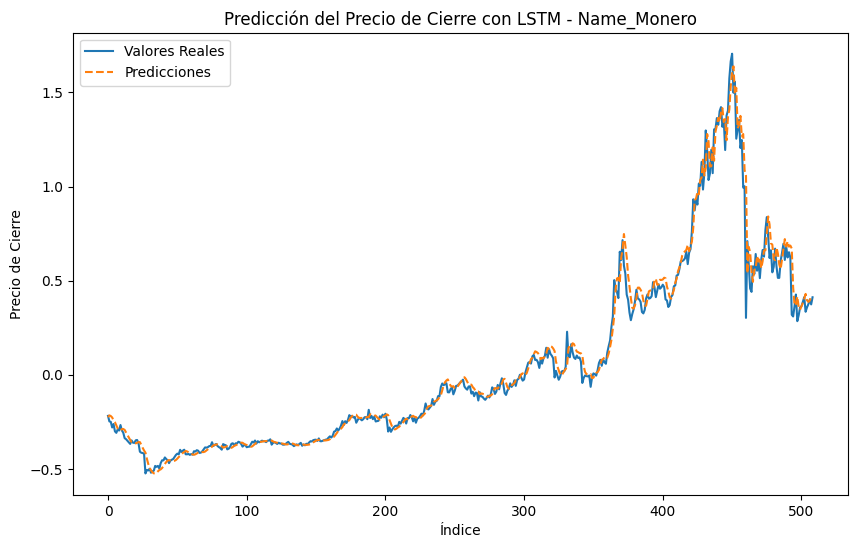

In [160]:
# Crear una lista de las criptomonedas (columnas codificadas)
crypto_columns = [col for col in df.columns if col.startswith('Name_')]

# Diccionario para almacenar resultados
results = {}

# Iterar sobre cada criptomoneda
for crypto_col in crypto_columns:
    print(f"Procesando predicciones para: {crypto_col}")
    
    # Filtrar los datos para la criptomoneda actual
    crypto_df = df[df[crypto_col] == 1].copy()
    
    # Ordenar por fecha
    crypto_df = crypto_df.sort_values(by='Date')
    
    # Normalizar la columna 'Close' para esta criptomoneda
    scaler = StandardScaler()
    crypto_df['Close'] = scaler.fit_transform(crypto_df[['Close']])
    
    # Crear secuencias para LSTM
    def create_sequences(data, sequence_length):
        X, y = [], []
        for i in range(len(data) - sequence_length):
            X.append(data[i:i + sequence_length])
            y.append(data[i + sequence_length])
        return np.array(X), np.array(y)
    
    sequence_length = 60  # Usar 60 días anteriores para predecir
    data = crypto_df['Close'].values
    X, y = create_sequences(data, sequence_length)
    
    # Dividir en conjuntos de entrenamiento y prueba
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Redimensionar los datos para LSTM (samples, timesteps, features)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    
    # Crear el modelo LSTM
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    
    # Compilar el modelo
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Entrenar el modelo
    model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))
    
    # Hacer predicciones
    predictions = model.predict(X_test)
    
    # Desescalar las predicciones y los valores reales
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
    
    # Guardar resultados en el diccionario
    results[crypto_col] = {
        'y_test': y_test,
        'predictions': predictions
    }
    
    # Visualizar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(y_test)), y_test, label='Valores Reales')
    plt.plot(range(len(predictions)), predictions, label='Predicciones', linestyle='--')
    plt.legend()
    plt.title(f'Predicción del Precio de Cierre con LSTM - {crypto_col}')
    plt.xlabel('Índice')
    plt.ylabel('Precio de Cierre')
    plt.show()
